In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from random import randint
from datetime import datetime
import tensorflow as tf

In [2]:
df = pd.read_csv('measures_v2.csv')

In [3]:
df.values

array([[-4.50681508e-01,  1.88051720e+01,  1.90866699e+01, ...,
         1.98506908e+01,  1.87100798e-01,  1.70000000e+01],
       [-3.25737000e-01,  1.88185711e+01,  1.90923901e+01, ...,
         1.98506718e+01,  2.45417491e-01,  1.70000000e+01],
       [-4.40864027e-01,  1.88287697e+01,  1.90893803e+01, ...,
         1.98506565e+01,  1.76615342e-01,  1.70000000e+01],
       ...,
       [-2.13031220e+00,  3.07213120e+01,  4.52115763e+01, ...,
         2.39772343e+01, -4.16726811e-60,  7.10000000e+01],
       [-2.26849850e+00,  3.07213161e+01,  4.51935076e+01, ...,
         2.40014212e+01, -2.98597808e-60,  7.10000000e+01],
       [-2.10015765e+00,  3.07213191e+01,  4.51323067e+01, ...,
         2.40275218e+01, -2.13954678e-60,  7.10000000e+01]])

In [32]:
df.isnull().sum()

u_q               0
coolant           0
stator_winding    0
u_d               0
stator_tooth      0
motor_speed       0
i_d               0
i_q               0
pm                0
stator_yoke       0
ambient           0
torque            0
profile_id        0
dtype: int64

In [33]:
df.info() #Obtemos información da cantidade e tipo de dato que tenos por columna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330816 entries, 0 to 1330815
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   u_q             1330816 non-null  float64
 1   coolant         1330816 non-null  float64
 2   stator_winding  1330816 non-null  float64
 3   u_d             1330816 non-null  float64
 4   stator_tooth    1330816 non-null  float64
 5   motor_speed     1330816 non-null  float64
 6   i_d             1330816 non-null  float64
 7   i_q             1330816 non-null  float64
 8   pm              1330816 non-null  float64
 9   stator_yoke     1330816 non-null  float64
 10  ambient         1330816 non-null  float64
 11  torque          1330816 non-null  float64
 12  profile_id      1330816 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 132.0 MB


In [34]:
df.describe()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
count,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06
mean,5.427900e+01,3.622999e+01,6.634275e+01,-2.513381e+01,5.687858e+01,2.202081e+03,-6.871681e+01,3.741278e+01,5.850678e+01,4.818796e+01,2.456526e+01,3.110603e+01,4.079306e+01
std,4.417323e+01,2.178615e+01,2.867206e+01,6.309197e+01,2.295223e+01,1.859663e+03,6.493323e+01,9.218188e+01,1.900150e+01,1.999100e+01,1.929522e+00,7.713575e+01,2.504549e+01
min,-2.529093e+01,1.062375e+01,1.858582e+01,-1.315304e+02,1.813398e+01,-2.755491e+02,-2.780036e+02,-2.934268e+02,2.085696e+01,1.807669e+01,8.783478e+00,-2.464667e+02,2.000000e+00
25%,1.206992e+01,1.869814e+01,4.278796e+01,-7.869090e+01,3.841601e+01,3.171107e+02,-1.154061e+02,1.095863e+00,4.315158e+01,3.199033e+01,2.318480e+01,-1.374265e-01,1.700000e+01
50%,4.893818e+01,2.690014e+01,6.511013e+01,-7.429755e+00,5.603635e+01,1.999977e+03,-5.109376e+01,1.577401e+01,6.026629e+01,4.562551e+01,2.479733e+01,1.086035e+01,4.300000e+01
75%,9.003439e+01,4.985749e+01,8.814114e+01,1.470271e+00,7.558668e+01,3.760639e+03,-2.979688e+00,1.006121e+02,7.200837e+01,6.146083e+01,2.621702e+01,9.159718e+01,6.500000e+01
max,1.330370e+02,1.015985e+02,1.413629e+02,1.314698e+02,1.119464e+02,6.000015e+03,5.189670e-02,3.017079e+02,1.136066e+02,1.011480e+02,3.071420e+01,2.610057e+02,8.100000e+01


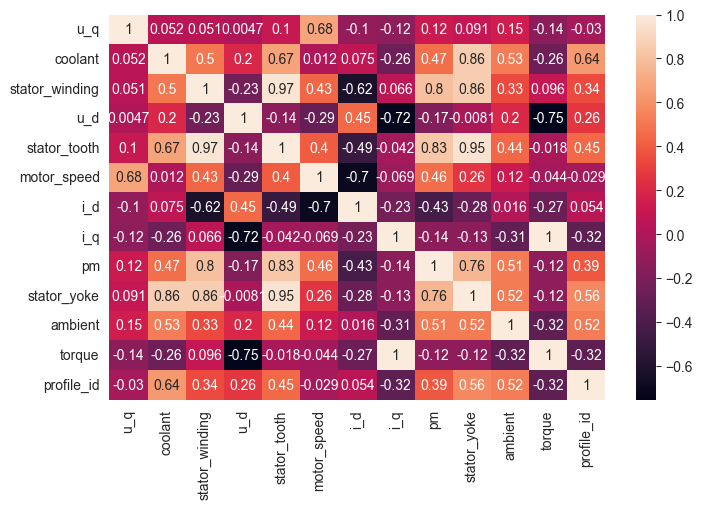

In [35]:
plt.figure(figsize=(8, 5)) #Imprimimos a matriz de correlación
sns.heatmap(df.corr(), annot=True)
plt.show()

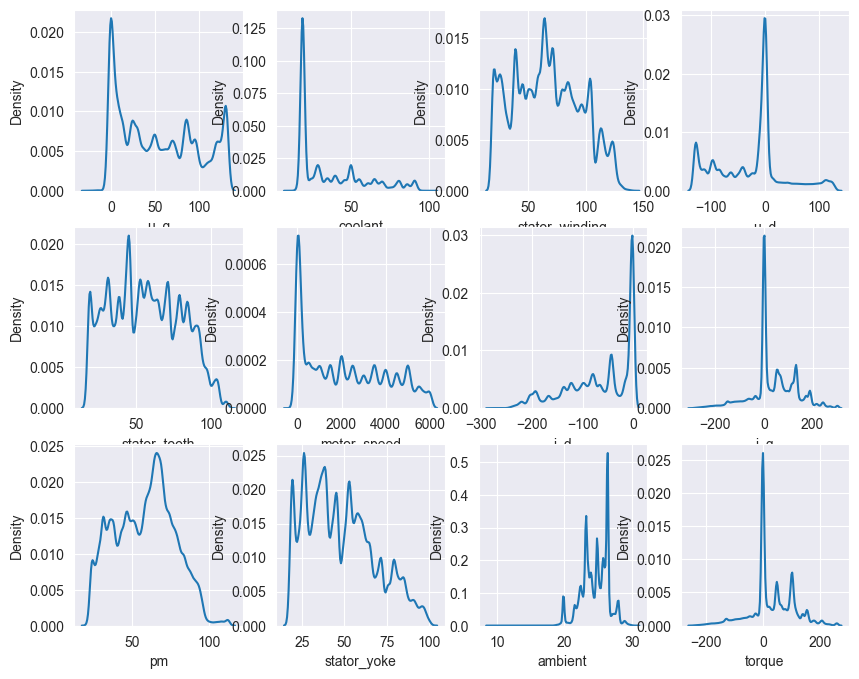

In [36]:
fig, axis =plt.subplots(3, 4, sharey = False, figsize=(10, 8))
for i in range(3):
    for j in range(4):
        sns.kdeplot(df[df.columns[i*4+j]], ax=axis[i,j])
plt.show()

C:\Users\roirt\PycharmProjects\pythonProject4\venv\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


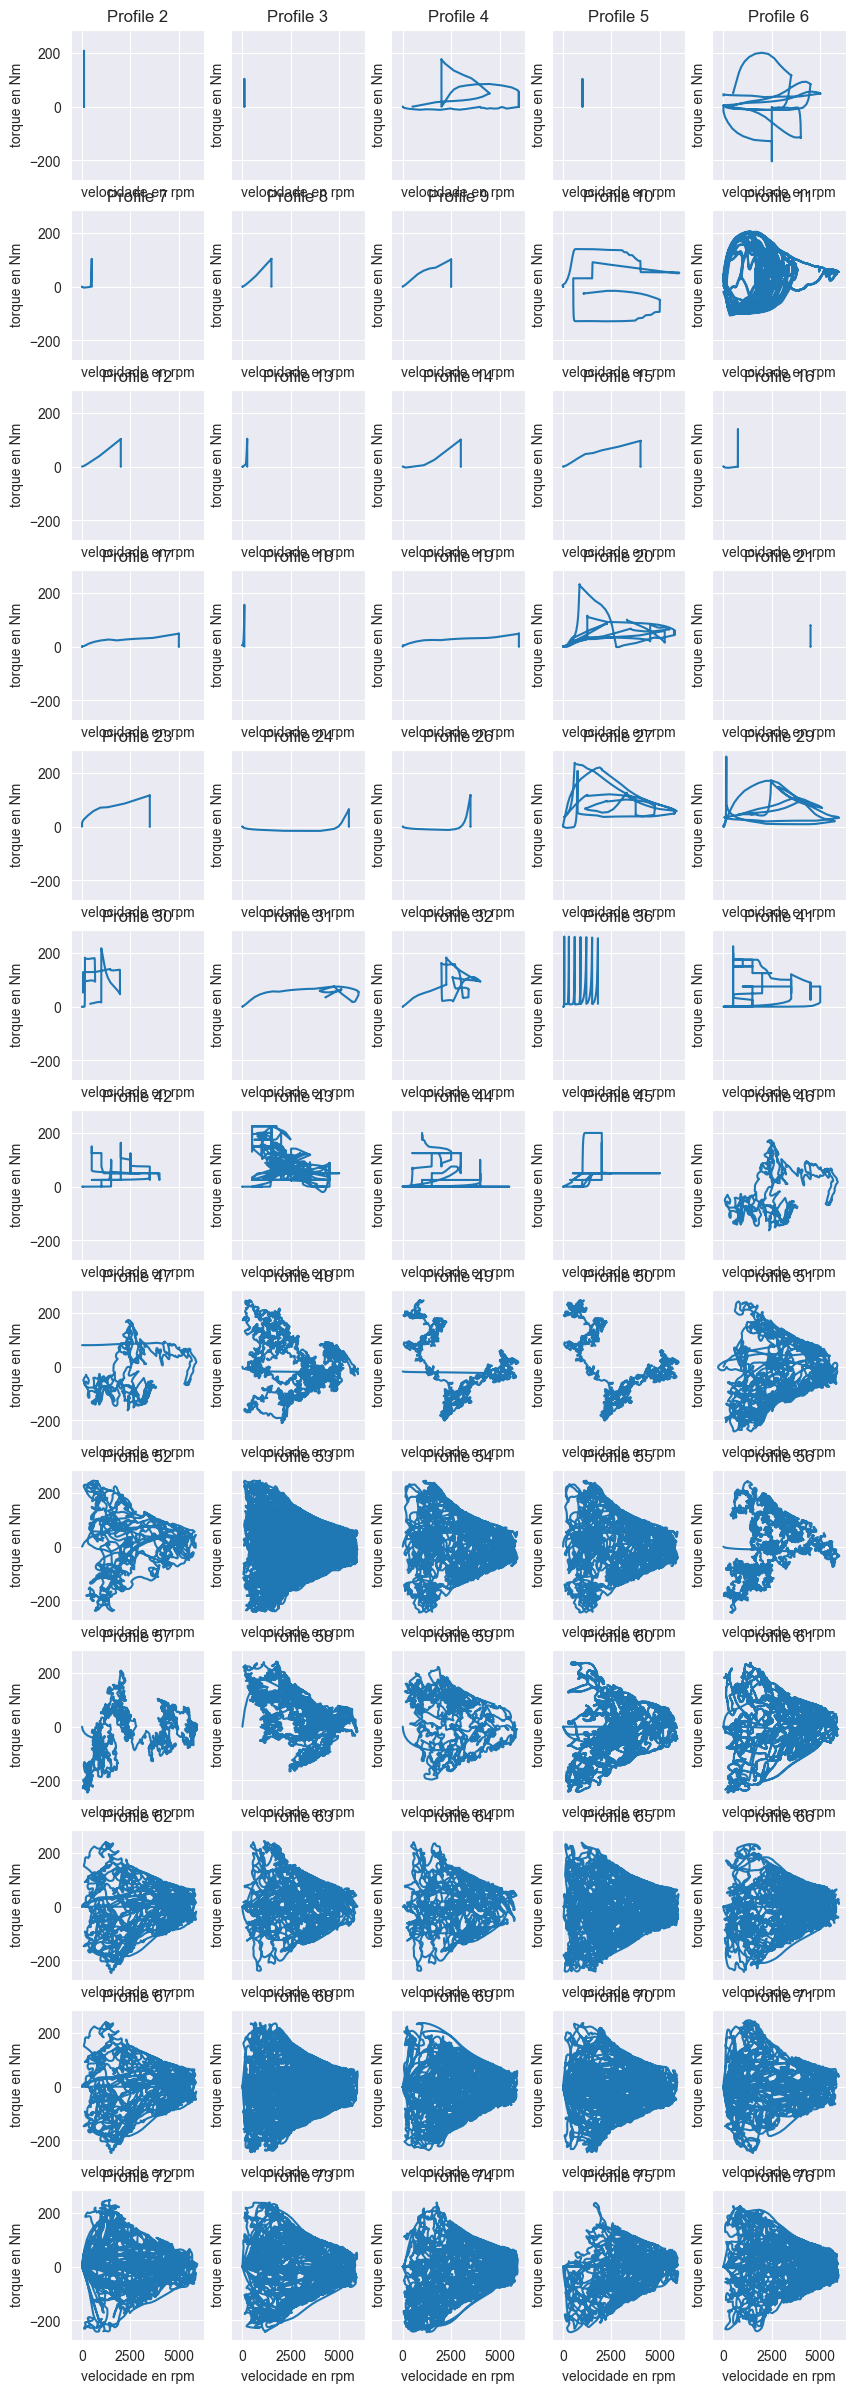

In [42]:
profile_ids = list(set(df['profile_id']))
n_cols = 5
n_rows = int(len(profile_ids) / n_cols)
fig, ax = plt.subplots(n_rows, n_cols, sharey=True, sharex=True, figsize=(10, 30))

for i in range(n_rows):
    for j in range(n_cols):
        id = profile_ids[i*n_cols+j]
        ax[i,j].plot(
            df.loc[df.loc[:, 'profile_id'] == id]['motor_speed'],
            df.loc[df.loc[:, 'profile_id'] == id]['torque'])
        ax[i,j].set_xlabel('velocidade en rpm')
        ax[i,j].set_ylabel('torque en Nm')
        ax[i,j].set_title('Profile ' + str(id))
fig.show()

In [43]:
features = df.columns.values

'''Estandarización'''

scalar = StandardScaler()
#Estandarizamos as entradas da rede
MASK = features != 'pm'

df[features[MASK][:-1]] = pd.DataFrame(scalar.fit_transform(df[features[MASK][:-1]]), columns=features[MASK][:-1])

'''Visulización datos'''
df.describe()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
count,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06
mean,7.553403e-16,3.970620e-16,-1.998871e-15,-7.756718e-17,1.236804e-15,4.073131e-16,-1.332652e-16,-3.803184e-16,5.850678e+01,-6.078944e-16,5.953538e-15,7.859230e-18,4.079306e+01
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.900150e+01,1.000000e+00,1.000000e+00,1.000000e+00,2.504549e+01
min,-1.801316e+00,-1.175346e+00,-1.665627e+00,-1.686374e+00,-1.688055e+00,-1.332301e+00,-3.223109e+00,-3.588988e+00,2.085696e+01,-1.506242e+00,-8.179116e+00,-3.598497e+00,2.000000e+00
25%,-9.555356e-01,-8.047253e-01,-8.215244e-01,-8.488737e-01,-8.043913e-01,-1.013609e+00,-7.190350e-01,-3.939704e-01,4.315158e+01,-8.102463e-01,-7.154374e-01,-4.050452e-01,1.700000e+01
50%,-1.209064e-01,-4.282472e-01,-4.299018e-02,2.806072e-01,-3.669520e-02,-1.086778e-01,2.714027e-01,-2.347401e-01,6.026629e+01,-1.281805e-01,1.202738e-01,-2.624682e-01,4.300000e+01
75%,8.094359e-01,6.255120e-01,7.602662e-01,4.216716e-01,8.150887e-01,8.380866e-01,1.012381e+00,6.855945e-01,7.200837e+01,6.639420e-01,8.560482e-01,7.842169e-01,6.500000e+01
max,1.782935e+00,3.000463e+00,2.616490e+00,2.482149e+00,2.399238e+00,2.042271e+00,1.059068e+00,2.867105e+00,1.136066e+02,2.649193e+00,3.186775e+00,2.980456e+00,8.100000e+01


In [48]:
test_ids = []
val_ids = []
profile_id = list(set(df['profile_id']))
sum_profile = df.groupby('profile_id')['profile_id'].count()

for i in range(9):
    num = randint(0, len(profile_id) - 1)
    test_ids.append(profile_id[num])
    profile_id.pop(num)
    num = randint(0, len(profile_id) - 1)
    val_ids.append(profile_id[num])
    profile_id.pop(num)

count_test = 0
for i in test_ids:
    count_test += sum_profile[i]

count_val = 0
for i in val_ids:
    count_val += sum_profile[i]

test_ids.sort()
val_ids.sort()

print("Para a validación usanse as sesións: ")
print(val_ids)
print("\nUsase o {}% dos datos para a validación, un total de {} horas.\n".format(count_val * 100 / len(df), round(count_val/7200,2)))

print("Para os test usanse as sesións: ")
print(test_ids)
print("\nUsase o {}% dos datos para os tests, un total de {} horas.".format(count_test * 100 / len(df), round(count_test/7200,2)))

Para a validación usanse as sesións: 
[17, 20, 26, 42, 45, 61, 70, 72, 81]

Usase o 13.813254424353179% dos datos para a validación, un total de 25.53 horas.

Para os test usanse as sesións: 
[15, 18, 30, 32, 44, 47, 55, 65, 74]

Usase o 15.318270895450611% dos datos para os tests, un total de 28.31 horas.


In [49]:
TS_dataset = np.array(df) #Convertimos o Dataframe de Pandas a unha array usando a librería numpy

Inputs_train = np.delete(TS_dataset[np.isin(
    TS_dataset[:, -1], test_ids+val_ids, invert=True)], [8, 12], axis=1)
Inputs_val = np.delete(TS_dataset[np.isin(
    TS_dataset[:, -1], val_ids, invert=False)], [8, 12], axis=1)

Outputs_train = TS_dataset[np.isin(
    TS_dataset[:, -1], test_ids+val_ids, invert=True), 8]
Outputs_val = TS_dataset[np.isin(
    TS_dataset[:, -1], val_ids, invert=False), 8]

In [52]:
DNN_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(
        16,
        input_shape=(Inputs_train.shape[1],), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])
DNN_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.000001),
    loss='mean_squared_error',
    metrics=['mae'])

history_DNN = DNN_model.fit(
    Inputs_train,
    Outputs_train,
    epochs=250,
    batch_size=512,
    validation_data=(Inputs_val, Outputs_val),
)

Epoch 1/250
1843/1843 [==============================] - 25s 12ms/step - loss: 3709.3345 - mae: 57.8350 - val_loss: 3958.5896 - val_mae: 61.0547
Epoch 2/250
1843/1843 [==============================] - 23s 12ms/step - loss: 3543.1006 - mae: 56.6688 - val_loss: 3740.9890 - val_mae: 59.4191
Epoch 3/250
1843/1843 [==============================] - 22s 12ms/step - loss: 3337.7124 - mae: 55.1760 - val_loss: 3477.1223 - val_mae: 57.3851
Epoch 4/250
1843/1843 [==============================] - 22s 12ms/step - loss: 3084.4709 - mae: 53.2096 - val_loss: 3165.6152 - val_mae: 54.8633
Epoch 5/250
1843/1843 [==============================] - 22s 12ms/step - loss: 2787.9958 - mae: 50.7051 - val_loss: 2834.5049 - val_mae: 52.0101
Epoch 6/250
1843/1843 [==============================] - 22s 12ms/step - loss: 2463.7253 - mae: 47.7022 - val_loss: 2475.1636 - val_mae: 48.6322
Epoch 7/250
1843/1843 [==============================] - 22s 12ms/step - loss: 2128.4246 - mae: 44.2659 - val_loss: 2111.7192 - va

In [53]:
def TimeSeriesFormat(dataset, samples=5):
    '''
    :param dataset: Set de datos a transformar - dtype: DataFrame - format: 13 columns (features)
    :param samples: Número de medicións a ter en conta como entrada - dtype: int
    :return: Set de datos transdormados según configuración - dtype: np.array ~ shape[:,sample,13]
    '''

    if set(dataset.columns.values) != set(features):
        print('Formato de columnas incorrecto')
        return

    elif (dataset.groupby('profile_id')['profile_id'].count() <
          samples).any():
        low_ids = \
            (dataset.groupby('profile_id')['profile_id'].count()
             < samples).iloc
        [lambda x: x.values == True].index
        print('Las mediciones con id: {} tienen '
              'menos de {} muestras'.format(low_ids, samples))
        return

    start = datetime.now()
    dataset = np.asarray(dataset)

    n_sample = 0
    ts_dataset = []
    while n_sample <= len(dataset) - samples:
        if len(set(dataset[n_sample:n_sample+samples, -1])) == 1:
            ts_dataset.append(dataset[n_sample:n_sample+samples])
        else:
            n_sample += samples - 2
        n_sample += 1

    print(datetime.now()-start)
    return np.asarray(ts_dataset)

TS_dataset = TimeSeriesFormat(df, 16)

Inputs_train = np.delete(TS_dataset[np.isin(
    TS_dataset[:, -1, -1], test_ids+val_ids, invert=True)], [8, 12], axis=2)
Inputs_test = np.delete(TS_dataset[np.isin(
    TS_dataset[:, -1, -1], test_ids, invert=False)], [8, 12], axis=2)
Inputs_val = np.delete(TS_dataset[np.isin(
    TS_dataset[:, -1, -1], val_ids, invert=False)], [8, 12], axis=2)

Outputs_train = TS_dataset[np.isin(
    TS_dataset[:, -1, -1], test_ids+val_ids, invert=True), -1, 8]
Outputs_test = TS_dataset[np.isin(
    TS_dataset[:, -1, -1], test_ids, invert=False), -1, 8]
Outputs_val = TS_dataset[np.isin(
    TS_dataset[:, -1, -1], val_ids, invert=False), -1, 8]


0:00:05.329152


In [54]:
CNN_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(
        filters=32,
        kernel_size=3,
        padding='same',
        activation='relu',
        input_shape=
        (Inputs_train.shape[1], Inputs_train.shape[2])
    ),
    tf.keras.layers.Conv1D(
        filters=64,
        kernel_size=3,
        padding='same',
        activation='relu'
    ),
    tf.keras.layers.Conv1D(
        filters=128,
        kernel_size=3,
        padding='same',
        activation='relu'
    ),
    tf.keras.layers.MaxPool1D(pool_size=2),
    tf.keras.layers.Conv1D(
        filters=32,
        kernel_size=3,
        padding='same',
        activation='relu'
    ),
    tf.keras.layers.Conv1D(
        filters=64,
        kernel_size=3,
        padding='same',
        activation='relu'
    ),
    tf.keras.layers.Conv1D(
        filters=128,
        kernel_size=3,
        padding='same',
        activation='relu'
    ),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1)
])

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau()

CNN_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.000001),
    loss='mean_squared_error',
    metrics=['mae'])


history_CNN = CNN_model.fit(
    Inputs_train,
    Outputs_train,
    epochs=150,
    steps_per_epoch=1250,
    batch_size=256,
    validation_data=(Inputs_val, Outputs_val),
    callbacks=[reduce_lr]
)

Epoch 1/150
1250/1250 [==============================] - 32s 24ms/step - loss: 3766.1353 - mae: 58.2126 - val_loss: 4079.0359 - val_mae: 61.9413 - lr: 1.0000e-06
Epoch 2/150
1250/1250 [==============================] - 28s 22ms/step - loss: 3657.1819 - mae: 57.3460 - val_loss: 3857.0261 - val_mae: 60.2008 - lr: 1.0000e-06
Epoch 3/150
1250/1250 [==============================] - 28s 23ms/step - loss: 3228.4202 - mae: 53.6687 - val_loss: 3111.2534 - val_mae: 53.8894 - lr: 1.0000e-06
Epoch 4/150
1250/1250 [==============================] - 29s 23ms/step - loss: 2084.4478 - mae: 41.9625 - val_loss: 1516.6858 - val_mae: 36.5891 - lr: 1.0000e-06
Epoch 5/150
1250/1250 [==============================] - 30s 24ms/step - loss: 703.7815 - mae: 21.9918 - val_loss: 428.1398 - val_mae: 16.7783 - lr: 1.0000e-06
Epoch 6/150
1250/1250 [==============================] - 30s 24ms/step - loss: 335.7650 - mae: 14.9852 - val_loss: 318.2705 - val_mae: 14.1628 - lr: 1.0000e-06
Epoch 7/150
1250/1250 [=========

In [55]:
LSTM_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(
        16,
        input_shape=(Inputs_train.shape[1], Inputs_train.shape[2]),
        return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(128, return_sequences=False),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1)
])

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau()

LSTM_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.000001),
    loss='mean_squared_error',
    metrics=['mae'])


history_LSTM = LSTM_model.fit(
    Inputs_train,
    Outputs_train,
    epochs=200,
    steps_per_epoch=1250,
    batch_size=256,
    validation_data=(Inputs_val, Outputs_val),
    callbacks=[reduce_lr]
)

Epoch 1/200
1250/1250 [==============================] - 149s 109ms/step - loss: 3777.5564 - mae: 58.3115 - val_loss: 4109.7231 - val_mae: 62.1768 - lr: 1.0000e-06
Epoch 2/200
1250/1250 [==============================] - 114s 91ms/step - loss: 3761.0105 - mae: 58.1901 - val_loss: 4078.2441 - val_mae: 61.9479 - lr: 1.0000e-06
Epoch 3/200
1250/1250 [==============================] - 118s 94ms/step - loss: 3695.6948 - mae: 57.6977 - val_loss: 3951.4438 - val_mae: 61.0500 - lr: 1.0000e-06
Epoch 4/200
1250/1250 [==============================] - 125s 100ms/step - loss: 3425.2124 - mae: 55.6949 - val_loss: 3471.1975 - val_mae: 57.4538 - lr: 1.0000e-06
Epoch 5/200
1250/1250 [==============================] - 132s 106ms/step - loss: 2799.6572 - mae: 50.5952 - val_loss: 2702.0427 - val_mae: 50.6779 - lr: 1.0000e-06
Epoch 6/200
1250/1250 [==============================] - 136s 109ms/step - loss: 2127.2954 - mae: 44.0169 - val_loss: 1978.7498 - val_mae: 42.7650 - lr: 1.0000e-06
Epoch 7/200
1250/1

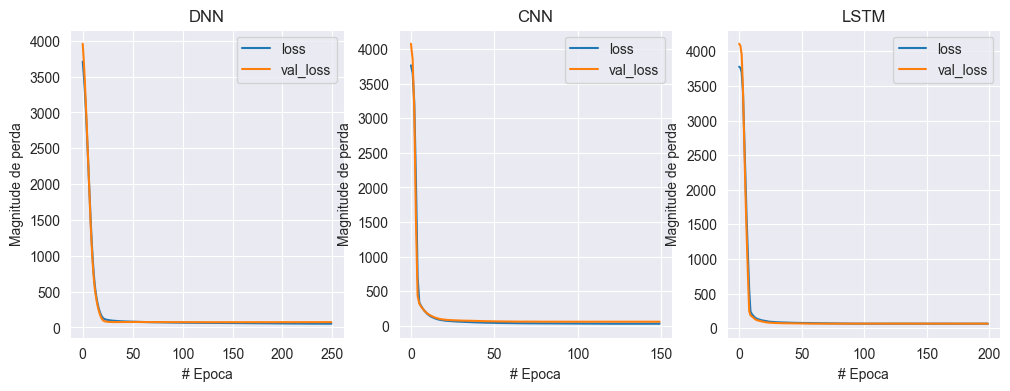

In [83]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
models=[history_DNN, history_CNN, history_LSTM]

for i, model in enumerate(models):
    ax[i].set_xlabel("# Epoca")
    ax[i].set_ylabel("Magnitude de perda")
    ax[i].plot(model.history['loss'])
    ax[i].plot(model.history['val_loss'])
    ax[i].legend(['loss','val_loss'])
    ax[i].set_title(next(key for key, value in locals().items() if value is model)[8:])


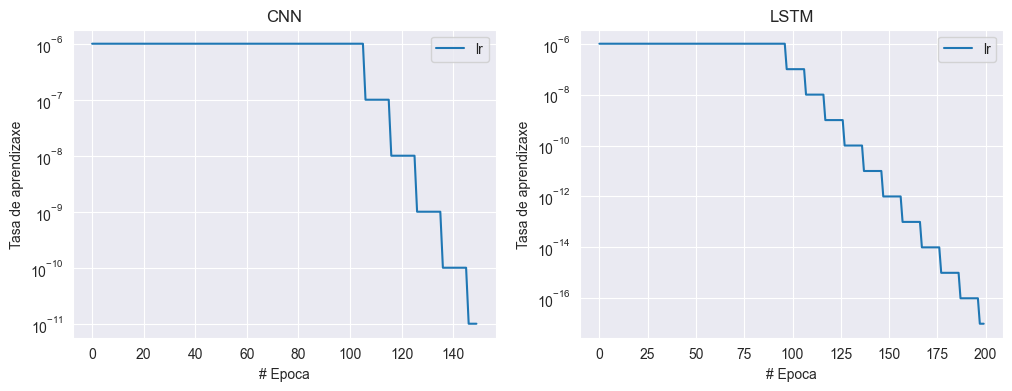

In [86]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
models=[history_CNN, history_LSTM]

for i, model in enumerate(models):
    ax[i].set_xlabel("# Epoca")
    ax[i].set_ylabel("Tasa de aprendizaxe")
    ax[i].plot(model.history['lr'])
    ax[i].set_yscale('log')
    ax[i].legend(['lr'])
    ax[i].set_title(next(key for key, value in locals().items() if value is model)[8:])


In [90]:
A = np.delete(np.array(df)[np.isin(
    np.array(df)[:, -1], test_ids, invert=False)], [8, 12], axis=1)
B = np.array(df)[np.isin(
    np.array(df)[:, -1], test_ids, invert=False), 8]

_ = DNN_model.evaluate(A, B, return_dict=False)
_ = CNN_model.evaluate(Inputs_test, Outputs_test, return_dict=False)
_ = LSTM_model.evaluate(Inputs_test, Outputs_test, return_dict=False)

6367/6367 [==============================] - 300s 47ms/step - loss: 44.0319 - mae: 5.1190


743/743 [==============================] - 3s 4ms/step


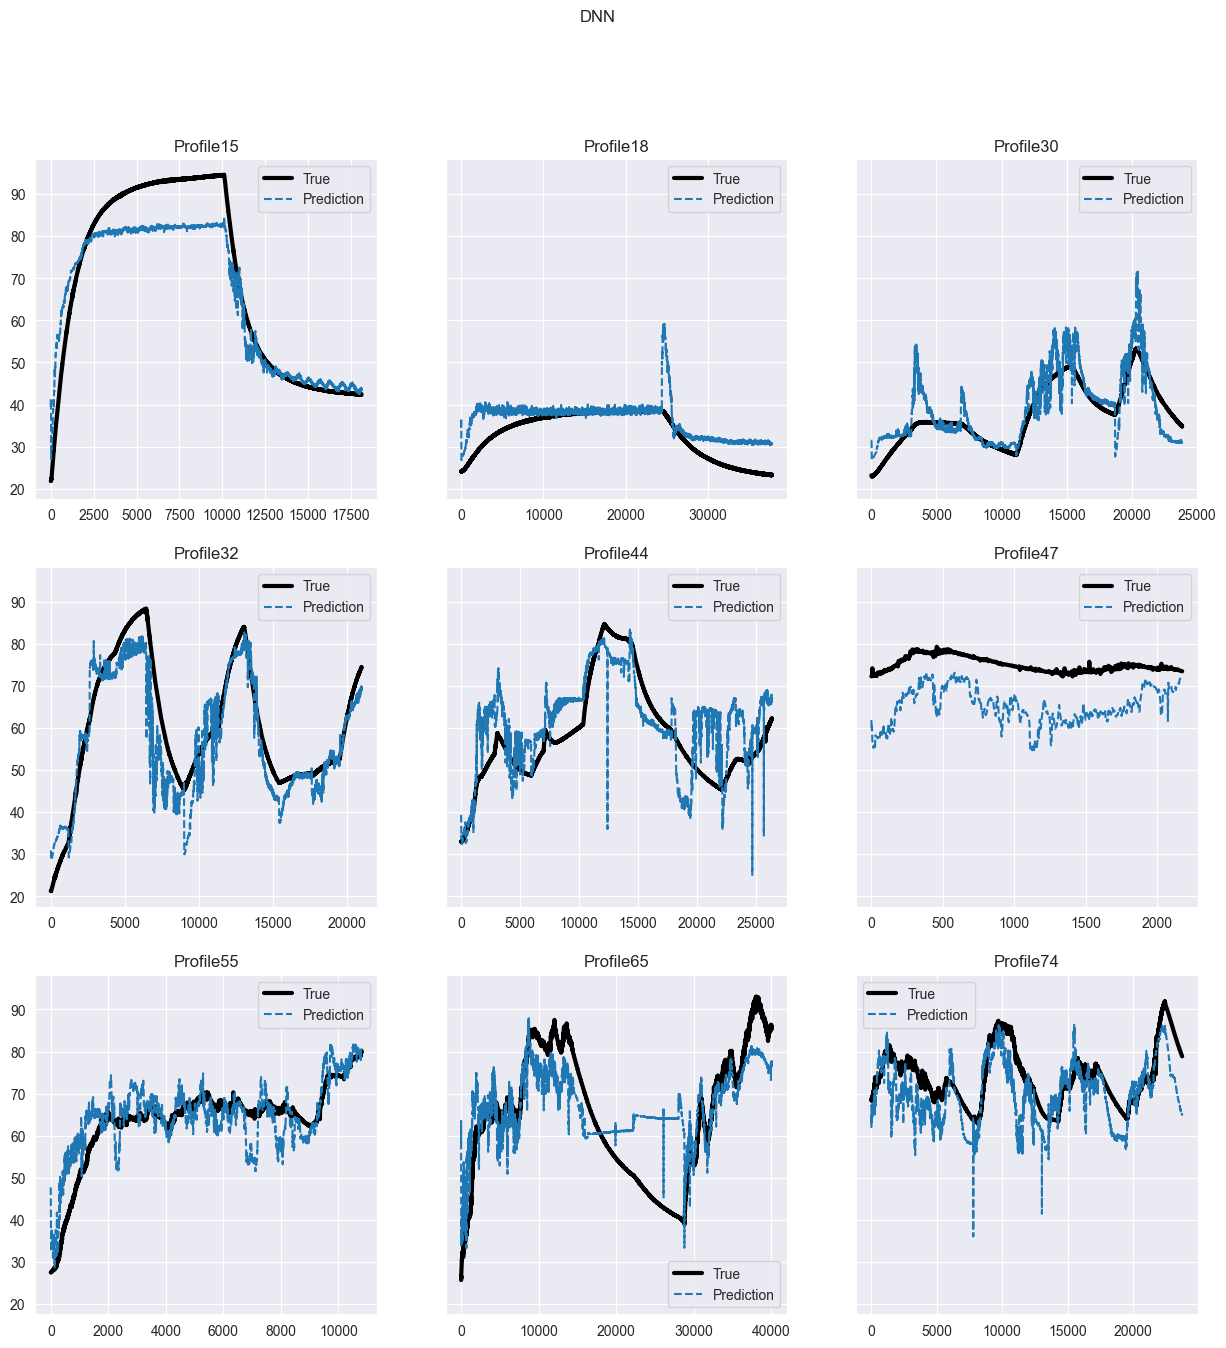

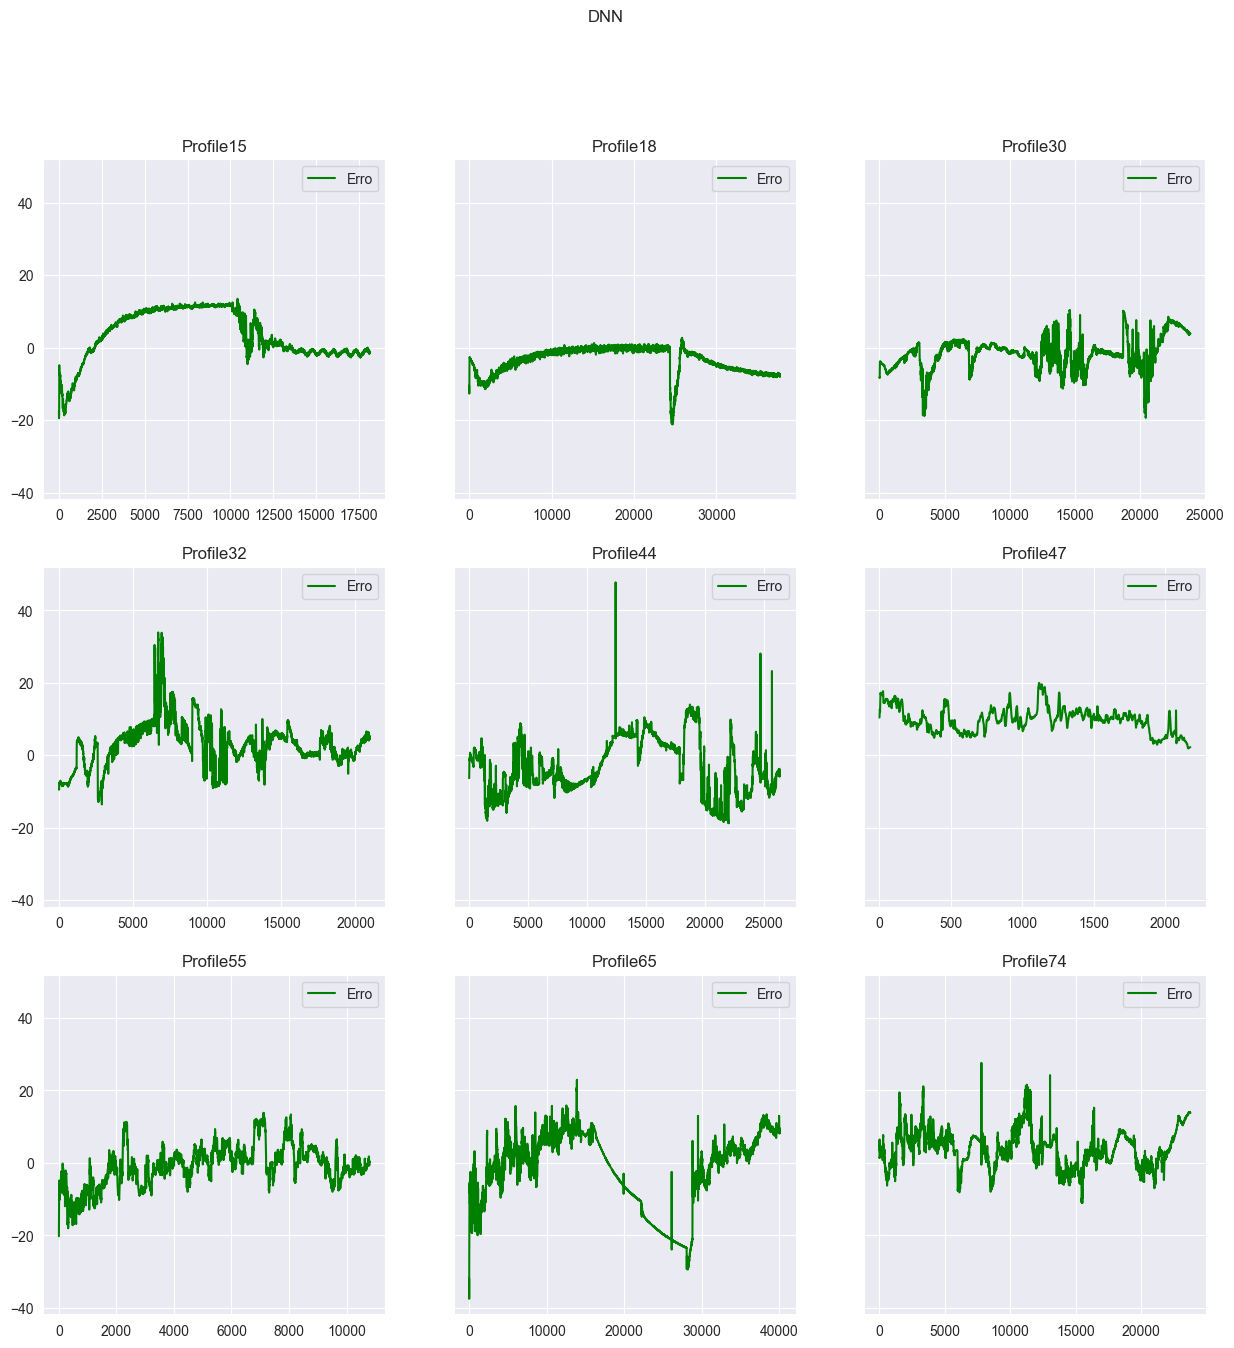

In [105]:
fig1, ax1 = plt.subplots(3, 3, sharey=True, figsize=(15,15))
fig2, ax2 = plt.subplots(3, 3, sharey=True, figsize=(15,15))
fig1.suptitle("DNN")
fig2.suptitle("DNN")

LIST_MSE_DNN=[]
LIST_MAE_DNN=[]
E_DNN = []

for i in range(3):
    for j in range(3):
        Inputs_test = np.delete(
            np.array(df)[(np.array(df)[:, -1] == test_ids[i*3+j])],
            [8, 12],
            axis=1)
        Outputs_test = \
            (np.array(df)[
                (np.array(df)[:, -1] == test_ids[i*3+j]), 8]
            ).reshape(-1, 1)
        prediction = DNN_model.predict(Inputs_test)
        ax1[i, j].plot(
            Outputs_test.reshape(-1),
            'k', linewidth=3)
        ax1[i, j].plot(
            prediction.reshape(-1),
            '--')
        ax2[i, j].plot(
            (Outputs_test - prediction).reshape(-1),
            'g')

        #Engadir erros de cada sesión
        E_DNN.append(
            (Outputs_test -prediction).reshape(-1))
        LIST_MSE_DNN.append(
            mean_squared_error(Outputs_test, prediction))
        LIST_MAE_DNN.append(mean_absolute_error(Outputs_test, prediction))

        ax1[i, j].legend(['True', 'Prediction'])
        ax2[i, j].legend(['Erro'])
        ax1[i, j].set_title('Profile'+str(test_ids[i*3+j]))
        ax2[i, j].set_title('Profile'+str(test_ids[i*3+j]))

743/743 [==============================] - 7s 9ms/step


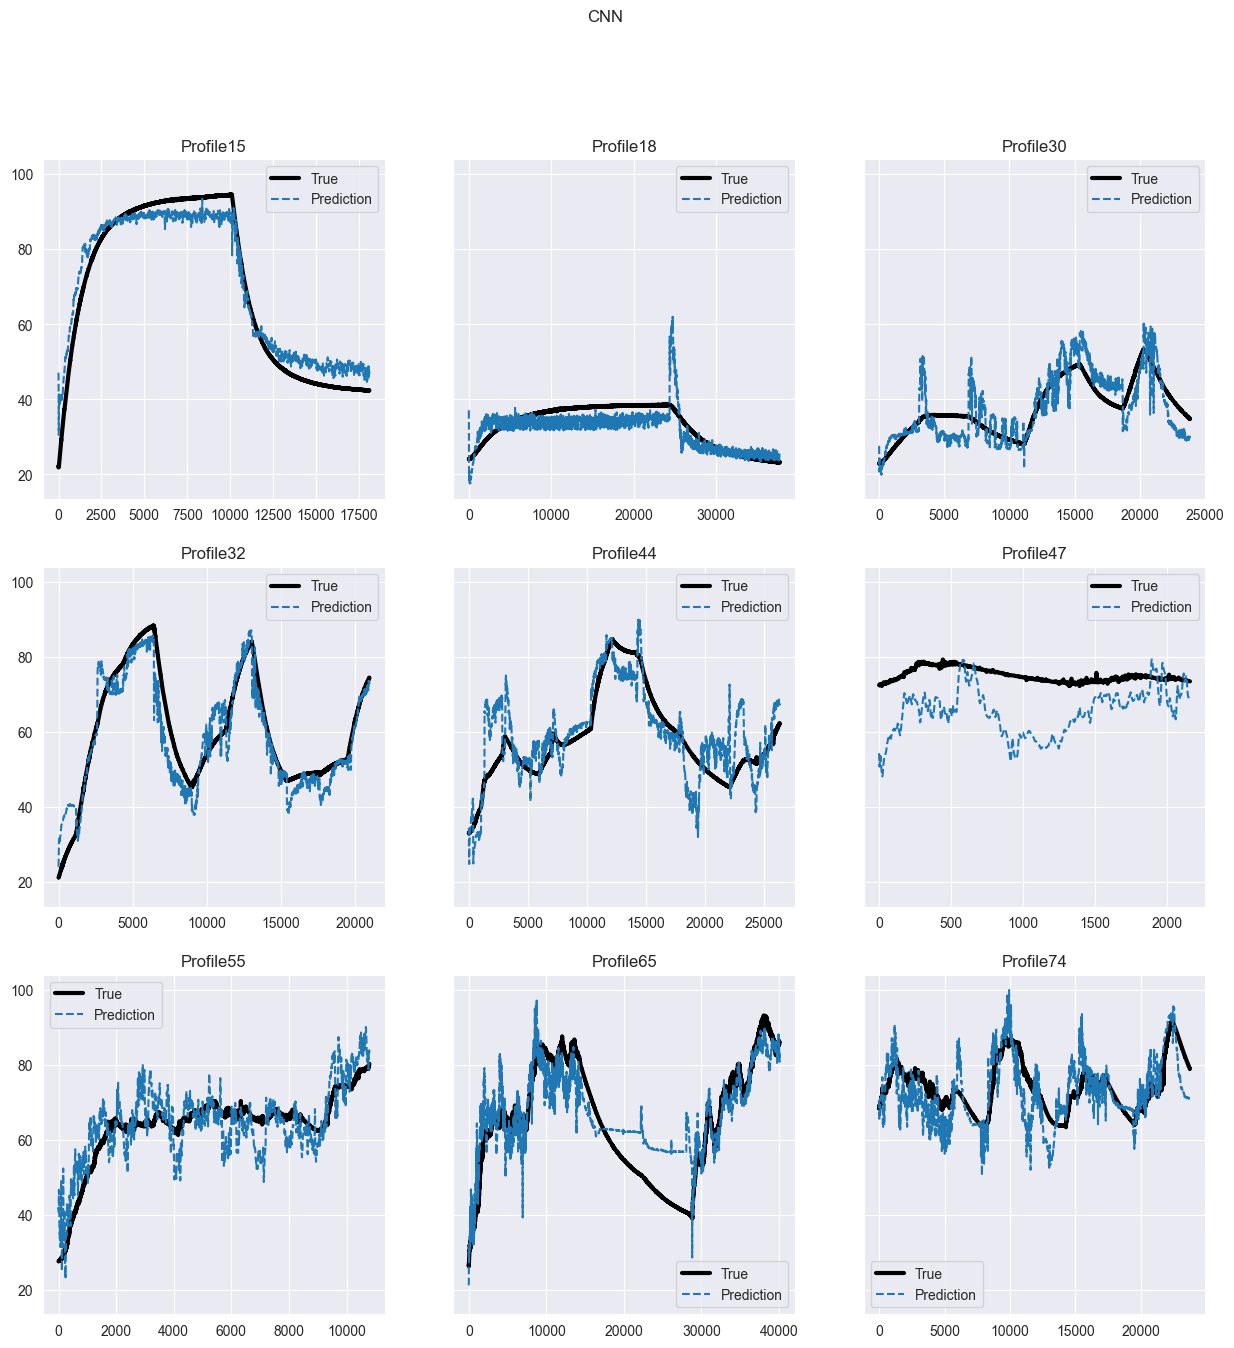

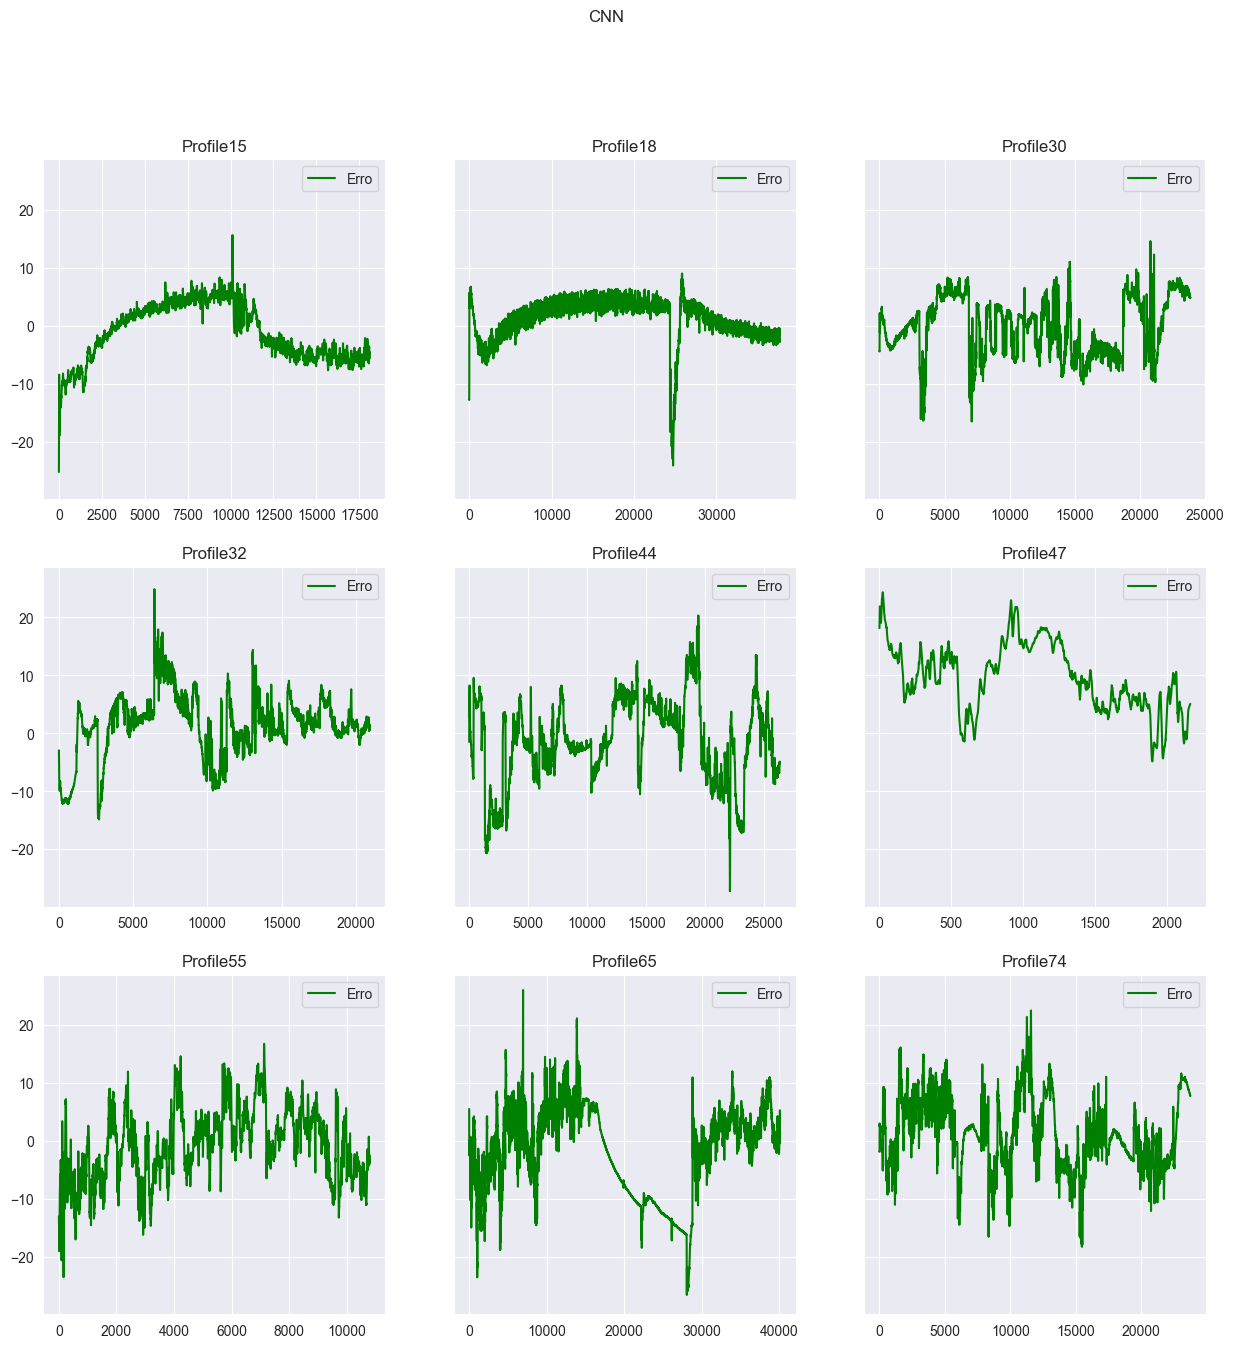

In [106]:
fig1, ax1 = plt.subplots(3, 3, sharey = True, figsize=(15,15))
fig2, ax2 = plt.subplots(3, 3, sharey = True, figsize=(15,15))
fig1.suptitle("CNN")  # Subtítulo de la figura
fig2.suptitle("CNN")  # Subtítulo de la figura

LIST_MSE_CNN = []
LIST_MAE_CNN = []
E_CNN = []

for i in range(3):
    for j in range(3):
        Inputs_test = np.delete(
            TS_dataset[(TS_dataset[:, -1, -1] == test_ids[i*3+j])],
            [8, 12],
            axis=2)
        Outputs_test = \
            (TS_dataset[
                (TS_dataset[:, -1, -1] == test_ids[i * 3 + j]), -1, 8]
            ).reshape(-1, 1)
        prediction = CNN_model.predict(Inputs_test)
        ax1[i, j].plot(
            Outputs_test.reshape(-1),
            'k', linewidth=3)
        ax1[i, j].plot(
            prediction.reshape(-1),
            '--')
        ax2[i, j].plot(
            (Outputs_test - prediction).reshape(-1),
            'g')

        #Engadir erros de cada sesión
        E_CNN.append(
            (Outputs_test -prediction).reshape(-1))
        LIST_MSE_CNN.append(
            mean_squared_error(Outputs_test, prediction))
        LIST_MAE_CNN.append(mean_absolute_error(Outputs_test, prediction))

        ax1[i, j].legend(['True', 'Prediction'])
        ax2[i, j].legend(['Erro'])
        ax1[i, j].set_title('Profile'+str(test_ids[i*3+j]))
        ax2[i, j].set_title('Profile'+str(test_ids[i*3+j]))

743/743 [==============================] - 36s 48ms/step


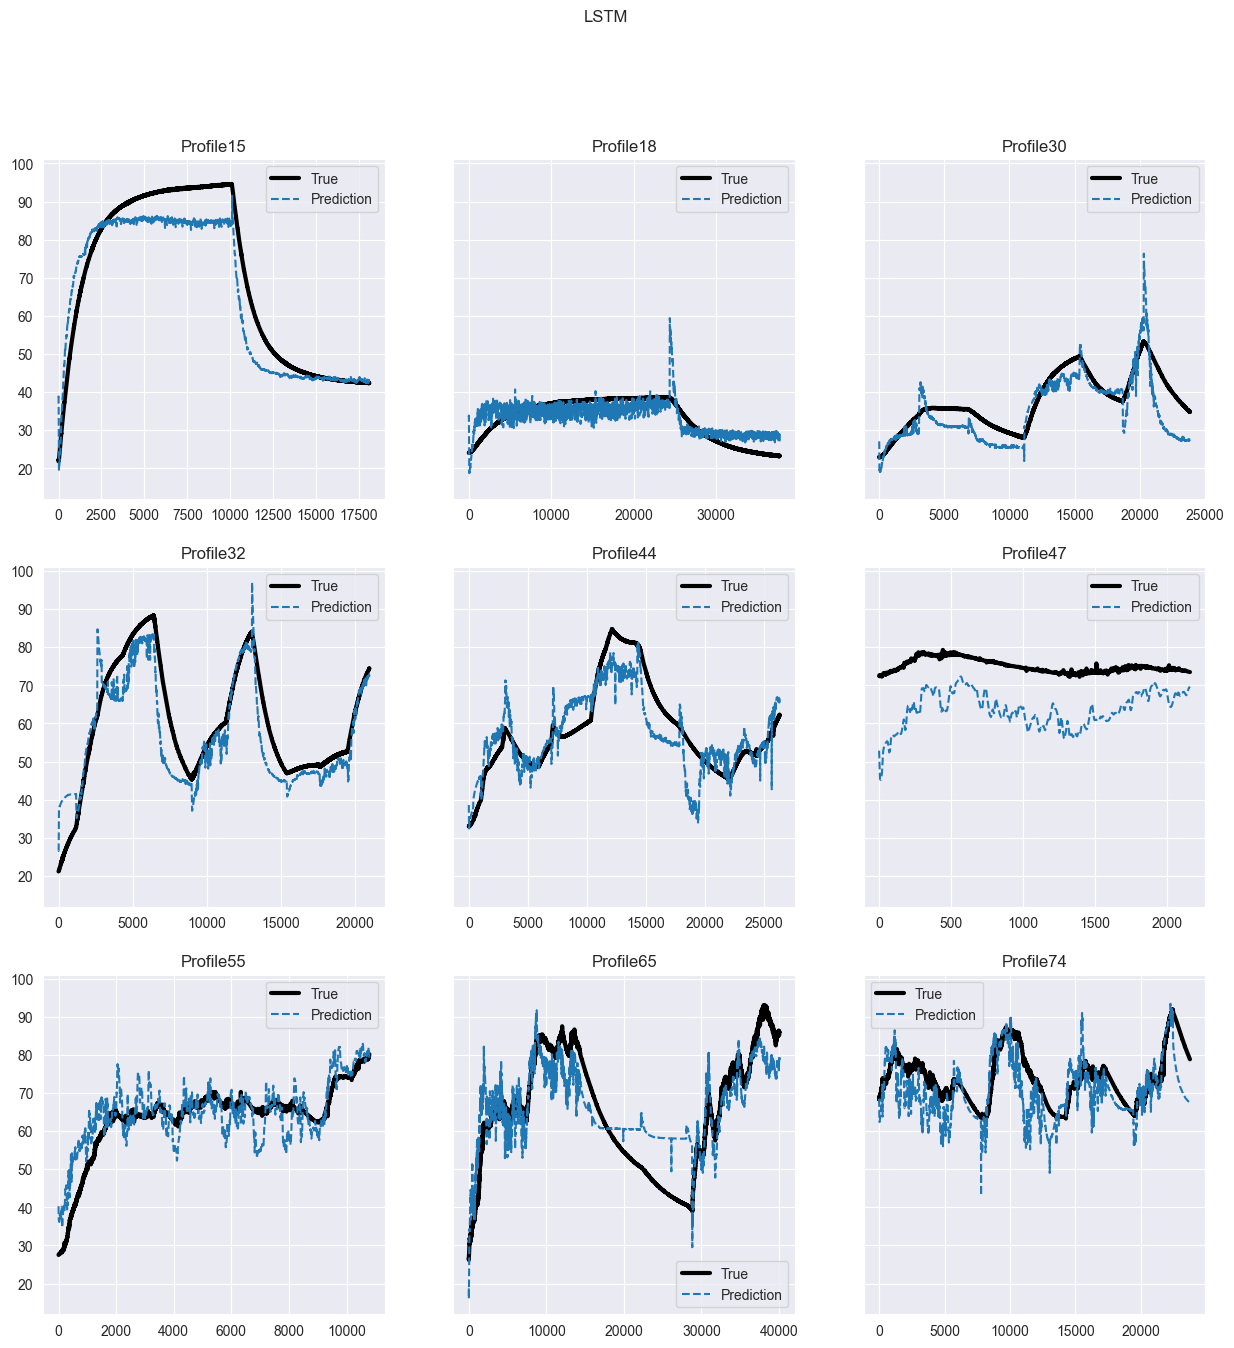

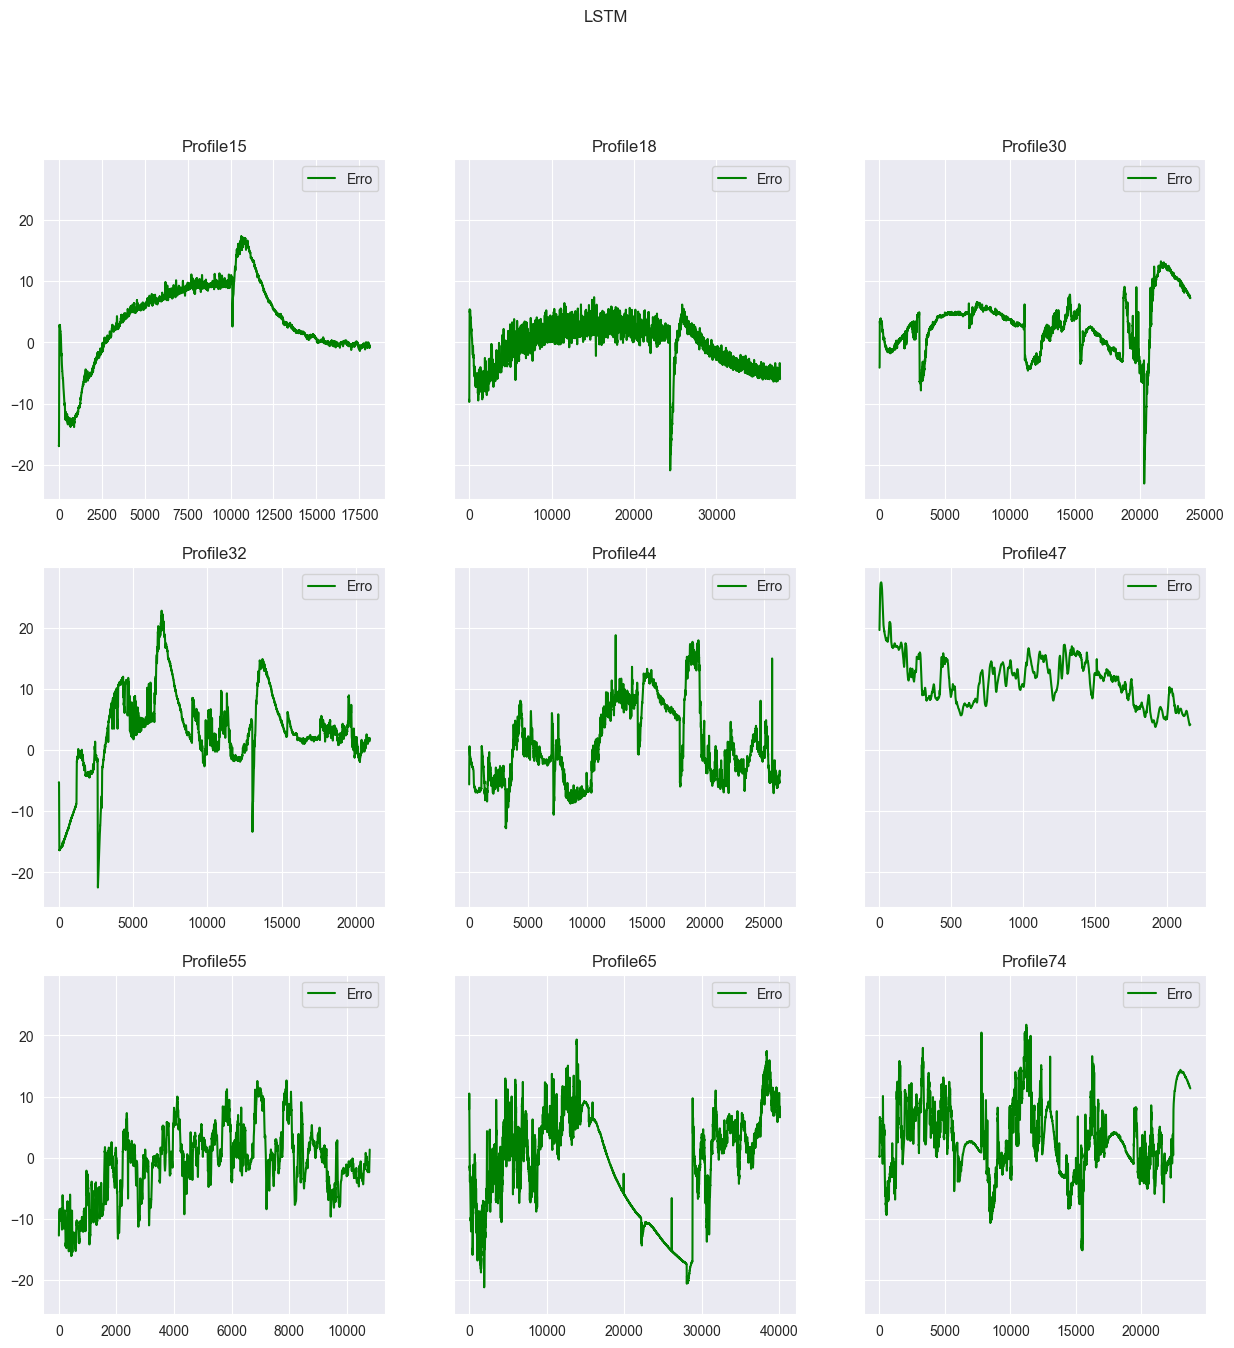

In [107]:
fig1, ax1 = plt.subplots(3, 3, sharey = True, figsize=(15,15))
fig2, ax2 = plt.subplots(3, 3, sharey = True, figsize=(15,15))
fig1.suptitle("LSTM")
fig2.suptitle("LSTM")

LIST_MSE_LSTM = []
LIST_MAE_LSTM = []
E_LSTM = []

for i in range(3):
    for j in range(3):
        Inputs_test = np.delete(
            TS_dataset[(TS_dataset[:, -1, -1] == test_ids[i*3+j])],
            [8, 12],
            axis=2)
        Outputs_test = \
            (TS_dataset[
                (TS_dataset[:, -1, -1] == test_ids[i * 3 + j]), -1, 8]
            ).reshape(-1, 1)
        prediction = LSTM_model.predict(Inputs_test)
        ax1[i, j].plot(
            Outputs_test.reshape(-1),
            'k', linewidth=3)
        ax1[i, j].plot(
            prediction.reshape(-1),
            '--')
        ax2[i, j].plot(
            (Outputs_test - prediction).reshape(-1),
            'g')

        #Engadir erros de cada sesión
        E_LSTM.append(
            (Outputs_test -prediction).reshape(-1))
        LIST_MSE_LSTM.append(
            mean_squared_error(Outputs_test, prediction))
        LIST_MAE_LSTM.append(mean_absolute_error(Outputs_test, prediction))

        ax1[i, j].legend(['True', 'Prediction'])
        ax2[i, j].legend(['Erro'])
        ax1[i, j].set_title('Profile'+str(test_ids[i*3+j]))
        ax2[i, j].set_title('Profile'+str(test_ids[i*3+j]))

In [177]:
results_DNN = []
results_CNN = []
results_LSTM = []
columns = ['Model', 'MSE', 'MAE', '|Emáx|']
rows = ['Profile ' + str(i) for i in test_ids] + ['x̄' ]

for i in range(len(rows)-1):
    results_DNN.append(['DNN', LIST_MSE_DNN[i], LIST_MAE_DNN[i], max(E_DNN[i].max(),-E_DNN[i].min())])
    results_CNN.append(['CNN', LIST_MSE_CNN[i], LIST_MAE_CNN[i], max(E_CNN[i].max(),-E_CNN[i].min())])
    results_LSTM.append(['LSTM', LIST_MSE_LSTM[i], LIST_MAE_LSTM[i], max(E_LSTM[i].max(),-E_LSTM[i].min())])

results_DNN.append(['DNN', np.mean(LIST_MSE_DNN), np.mean(LIST_MAE_DNN), np.mean(list(zip(*results_DNN))[-1])])
results_CNN.append(['CNN', np.mean(LIST_MSE_CNN), np.mean(LIST_MAE_CNN), np.mean(list(zip(*results_CNN))[-1])])
results_LSTM.append(['LSTM', np.mean(LIST_MSE_LSTM), np.mean(LIST_MAE_LSTM), np.mean(list(zip(*results_LSTM))[-1])])

results_DNN = pd.DataFrame(results_DNN, index=rows, columns=columns)
results_CNN = pd.DataFrame(results_CNN, index=rows, columns=columns)
results_LSTM = pd.DataFrame(results_LSTM, index=rows, columns=columns)

In [179]:
print(results_DNN)
print()
print(results_CNN)
print()
print(results_LSTM)

           Model         MSE       MAE     |Emáx|
Profile 15   DNN   59.334071  6.105673  19.484673
Profile 18   DNN   25.002378  3.564559  21.160473
Profile 30   DNN   23.554936  3.630235  19.296837
Profile 32   DNN   46.558191  5.094683  33.887215
Profile 44   DNN   69.123536  7.064995  47.709686
Profile 47   DNN  107.209877  9.762094  19.973857
Profile 55   DNN   30.683619  4.202859  20.230182
Profile 65   DNN  109.877494  8.271570  37.501832
Profile 74   DNN   42.853297  5.267069  27.602369
x̄           DNN   57.133044  5.884860  27.427458

           Model         MSE       MAE     |Emáx|
Profile 15   CNN   25.085338  4.350602  25.236687
Profile 18   CNN   14.745839  2.892252  24.128487
Profile 30   CNN   26.413548  4.358522  16.519936
Profile 32   CNN   32.062972  4.302227  24.878559
Profile 44   CNN   53.693246  5.827060  27.231614
Profile 47   CNN  127.093264  9.862474  24.344914
Profile 55   CNN   37.675616  4.970478  23.497323
Profile 65   CNN   62.827052  6.347729  26.558073